In [85]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [178]:
requests.get("https://www.ambitionbox.com/list-of-companies?page=2").text

'<HTML><HEAD>\n<TITLE>Access Denied</TITLE>\n</HEAD><BODY>\n<H1>Access Denied</H1>\n \nYou don\'t have permission to access "http&#58;&#47;&#47;www&#46;ambitionbox&#46;com&#47;list&#45;of&#45;companies&#63;" on this server.<P>\nReference&#32;&#35;18&#46;965d3a17&#46;1689022305&#46;16a252f3\n</BODY>\n</HTML>\n'

In [179]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
web_page= requests.get("https://www.ambitionbox.com/list-of-companies?page=3",headers = headers).text

In [180]:
soup = BeautifulSoup(web_page,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   List of companies - 860k companies | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/>
  <meta content="712617688793459" data-n-head="ssr" property="fb:app_id"/>
  <meta content="#ffffff" data-n-head="ssr" name="theme-color"/>
  <meta content="#ffffff" data-n-head="ssr" name="msapplication-navbutton-color"/>

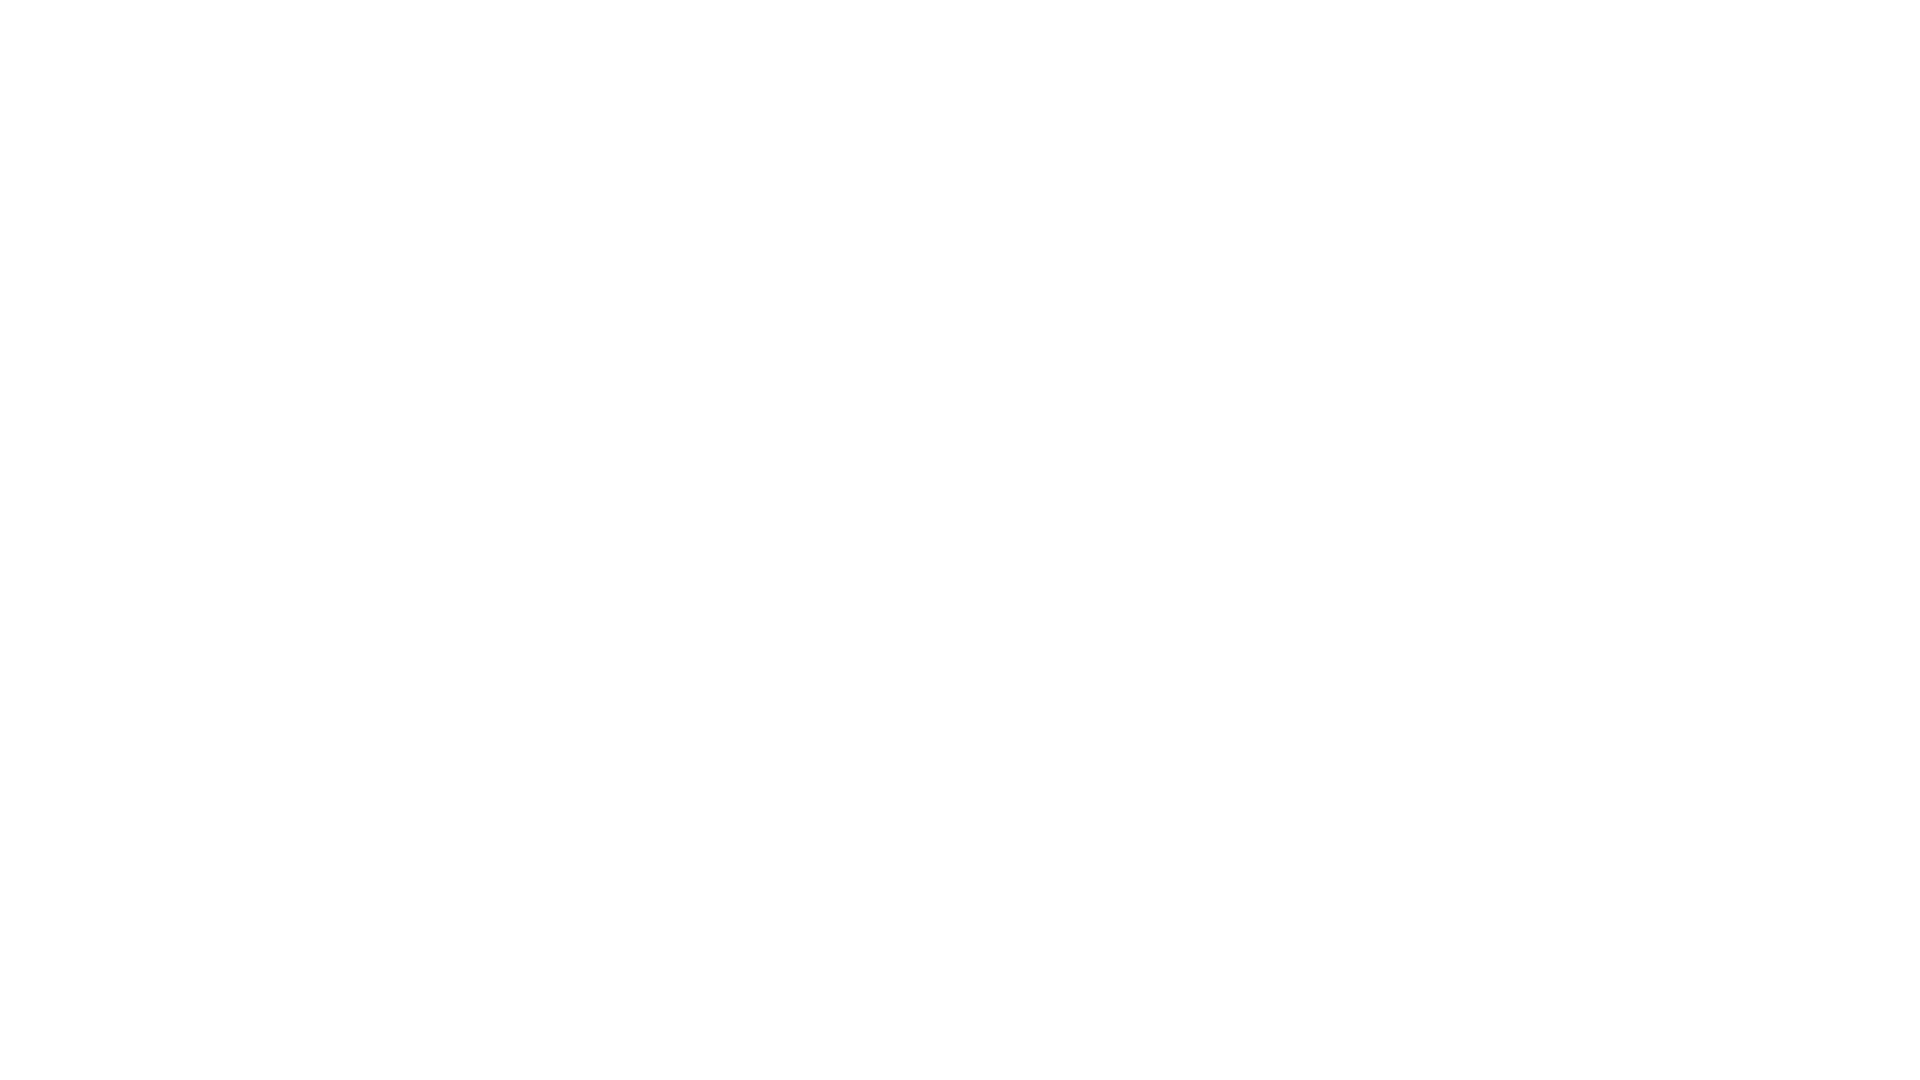

In [181]:
print(soup.prettify())

In [9]:
soup.find_all('h1')

[<h1 class="bold-title-l title">List of companies in India</h1>]

In [10]:
soup.find_all('h1')[0]

<h1 class="bold-title-l title">List of companies in India</h1>

In [11]:
soup.find_all('h1')[0].text

'List of companies in India'

In [182]:
for i in soup.find_all('h2'):
    print(i.text.strip())

Bajaj Finance
Paytm
Bandhan Bank
L&T Infotech
Indian Army
ITC
Mindtree
Ujjivan Small Fi...
Hindustan Unilev...
JP Morgan Chase
AU Small Finance...
Delhivery
Wells Fargo
IIFL Finance
Home Credit Fina...
Quess
Sun Pharmaceutic...
Amazon Developme...
OPPO
TATA Steel
Ashok Leyland
Shapoorji Pallon...
Hexaware Technol...
Shriram Transpor...
JSW Steel
Vivo
Aurobindo Pharma
Zydus Cadila
Max Life Insuran...
Muthoot Finance


In [34]:
soup.find_all("p",class_='infoEntity')

[<p class="infoEntity sbold-list-header"><i class="icon-domain"></i>
 							Public
 						</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-pin-drop"></i>
 							Mumbai,Maharashtra + 276 more
 						</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-access-time"></i>
 							55 years old
 						</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-supervisor-account"></i>
 							1 Lakh+ Employees (India)
 						</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-domain"></i>
 							Public
 						</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-pin-drop"></i>
 							Dublin + 139 more
 						</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-access-time"></i>
 							34 years old
 						</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-supervisor-account"></i>
 							1 Lakh+ Employees (India)
 						</p>,
 <p class="infoEntity sbold-list-header"><i class="icon-domain"></i>
 							Private
 						</p>,
 <p 

In [35]:
company = soup.find_all('div',class_='company-content-wrapper')

In [236]:
final_df = pd.DataFrame()
for j in range(1,333):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    url=f"https://www.ambitionbox.com/list-of-companies?page={j}"
    web_page= requests.get(url,headers = headers).text
    soup = BeautifulSoup(web_page,'lxml')
    company = soup.find_all('div',class_='company-content-wrapper')
    name = []
    rating = []
    review= []
    Type  = []
    headquater = []
    years_odd = []
    employees = []
    
    for i in company:

                try:
                  name.append(i.find('h2').text.strip())
                except:
                    name.append(None)
                try:
                    rating.append(i.find('p',class_="rating").text.strip())
                except:
                    rating.append(None) 
                try:
                    review.append(i.find('a',class_="review-count").text.strip())
                except:
                    review.append(None)
                try:    
                    Type.append(i.find_all("p",class_="infoEntity")[0].text.strip())
                except:
                    Type.append(None)
                try:
    
                    headquater.append(i.find_all("p",class_="infoEntity")[1].text.strip())
                except:
                    headquater.append(None)
                try:
                    years_odd.append(i.find_all("p",class_="infoEntity")[2].text.strip())
                except:
                    years_odd.append(None)
                try :
                    employees.append(i.find_all("p",class_="infoEntity")[3].text.strip())

                except:
               # for j in [name,rating,review,Type,headquater,years_odd,employees]:
                    employees.append(np.nan)

    d = {"name":name,"rating":rating,"review":review,"Type":Type,'headquater':headquater,'years_odd':years_odd,"employees":employees}

    df = pd.DataFrame(d)
    
    
    final_df = pd.concat([final_df,df],ignore_index=True)
    
    

    

            

In [ ]:
import time
start_time = time.time()
final_df2 = pd.DataFrame()
for j in range(1,333):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    url=f"https://www.ambitionbox.com/list-of-companies?page={j}"
    web_page= requests.get(url,headers = headers).text
    soup = BeautifulSoup(web_page,'lxml')
    companies = soup.find_all('div',class_='company-content-wrapper')
    
    data= []
    
    for company in companies:
        name = company.find('h2').text.strip()
        rating = company.find("p",class_="rating").text.strip()
        review = company.find('a',class_="review-count").text.strip()
        company_info = company.find_all("p",class_="infoEntity")
        
        company_data = {"name":name,
                        "rating":rating,
                        "review":review,
                        "Type":company_info[0].text.strip() if len(company_info)>1 else None,
                        'headquater':company_info[1].text.strip() if len(company_info)>1 else None,
                        'years_odd':company_info[2].text.strip() if len(company_info)>2 else None,
                        "employees":company_info[3].text.strip() if len(company_info)>3 else None
                       }
        
        data.append(company_data)
        
    df = pd.DataFrame(data)
    final_df2 = pd.concat([final_df2, df], ignore_index=True)

end_time = time.time()
print(elapsed_time = end_time - start_time)
        


In [256]:
end_time-start_time

110.73985838890076

In [257]:
final_df2.shape

(9959, 7)

In [259]:
final_df2.head()

,name,rating,review,Type,headquater,years_odd,employees
0,TCS,3.8,(59.7k Reviews),Public,"Mumbai,Maharashtra + 276 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(38.2k Reviews),Public,Dublin + 139 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,3.9,(34.8k Reviews),Private,Teaneck. New Jersey. + 109 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(28.5k Reviews),Public,"Mumbai,Maharashtra + 1153 more",29 years old,1 Lakh+ Employees (India)
4,Wipro,3.9,(28.3k Reviews),Public,"Bangalore/Bengaluru,Karnataka + 235 more",78 years old,1 Lakh+ Employees (India)


In [260]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        9959 non-null   object
 1   rating      9959 non-null   object
 2   review      9959 non-null   object
 3   Type        9765 non-null   object
 4   headquater  9765 non-null   object
 5   years_odd   9350 non-null   object
 6   employees   8096 non-null   object
dtypes: object(7)
memory usage: 544.8+ KB


In [262]:
final_df2.to_csv("Companies dataset.csv",index=False)